#### Import Statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from collections import Counter

# Loading the Data

In [2]:
image_resolution = 384

(384, 384)


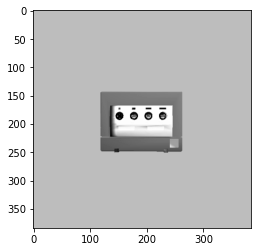

In [4]:
# Example of loading the first image
image_path = "GameCubeRotations\gamecube_{}_{}.png".format(image_resolution, 0)
image = tf.keras.preprocessing.image.load_img(image_path, color_mode="grayscale")
input_arr =tf. keras.preprocessing.image.img_to_array(image).reshape(image_resolution, image_resolution)
print(input_arr.shape)
plt.imshow(input_arr, cmap="gray")
plt.show()

In [5]:
plain_images = []
for i in range(360):
    image_path = "GameCubeRotations\gamecube_{}_{}.png".format(image_resolution, i)
    image = tf.keras.preprocessing.image.load_img(image_path, color_mode="grayscale")
    input_arr = tf.keras.preprocessing.image.img_to_array(image).reshape(image_resolution, image_resolution)
    plain_images.append(input_arr)
plain_images = np.array(plain_images)

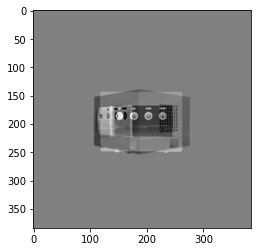

In [67]:
plt.imshow(plain_images[45] - plain_images[0], cmap="gray")
plt.show()

# Computing Differences Between Images

In [65]:
# How many random pairs of images we will subtract
num_differences = 4000

# Keep track of which pairs have been seen
seen_differences = set()

data = []
target = []

np.random.seed(5)
for _ in range(num_differences):
    index1 = np.random.randint(0, 360)
    index2 = np.random.randint(0, 360)
    
    # Ignore duplicates
    while (index1, index2) in seen_differences:
        index1 = np.random.randint(0, 360)
        index2 = np.random.randint(0, 360)

    seen_differences.add( (index1, index2) )
    data.append(plain_images[index2] - plain_images[index1])
    degree_difference = index2 - index1
    #if degree_difference <= -180:
    #    degree_difference += 360
    #if degree_difference > 180:
    #    degree_difference -= 360
    target.append(degree_difference)
    
data = np.array(data)
target = np.array(target)
print(data.shape)
print(target.shape)

(4000, 384, 384)
(4000,)


#### How Uniform is the Distribution?

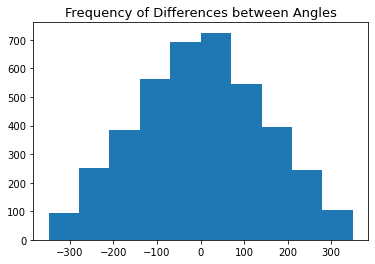

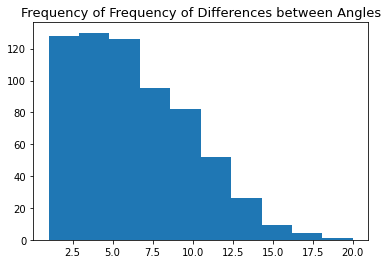

In [68]:
plt.hist(target)
plt.title("Frequency of Differences between Angles", fontsize=13)
plt.show()
# the frequency of the frequencies
frequencies = dict(Counter(target))
plt.hist(list(frequencies.values()))
plt.title("Frequency of Frequency of Differences between Angles", fontsize=13)
plt.show()

# Preparing the Model

In [71]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.125, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=float(1)/7, random_state=11)
print("X train: {}".format(X_train.shape))
print("y train: {}".format(y_train.shape))
print("X val: {}".format(X_val.shape))
print("y val: {}".format(y_val.shape))
print("X test: {}".format(X_test.shape))
print("y test: {}".format(y_test.shape))

X train: (3000, 384, 384)
y train: (3000,)
X val: (500, 384, 384)
y val: (500,)
X test: (500, 384, 384)
y test: (500,)


In [72]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(image_resolution, image_resolution)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation="linear")
])

In [73]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mean_squared_error')

# Training

In [74]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val,y_val), batch_size=32)

Epoch 1/50
94/94 [==============================] - 26s 275ms/step - loss: 3014351.2500 - val_loss: 16888.8555
Epoch 2/50
94/94 [==============================] - 22s 231ms/step - loss: 16759.4355 - val_loss: 16623.8281
Epoch 3/50
94/94 [==============================] - 20s 214ms/step - loss: 16063.2158 - val_loss: 15347.7002
Epoch 4/50
94/94 [==============================] - 18s 194ms/step - loss: 14847.4990 - val_loss: 14385.6064
Epoch 5/50
94/94 [==============================] - 19s 202ms/step - loss: 13564.9629 - val_loss: 11478.7559
Epoch 6/50
94/94 [==============================] - 24s 260ms/step - loss: 12200.1201 - val_loss: 9976.9121
Epoch 7/50
94/94 [==============================] - 20s 214ms/step - loss: 10961.2461 - val_loss: 8944.5527
Epoch 8/50
94/94 [==============================] - 20s 215ms/step - loss: 9288.7119 - val_loss: 7488.0981
Epoch 9/50
94/94 [==============================] - 19s 206ms/step - loss: 6983.5166 - val_loss: 5031.6597
Epoch 10/50
94/94 [====

In [75]:
test_predictions = model.predict(X_test)

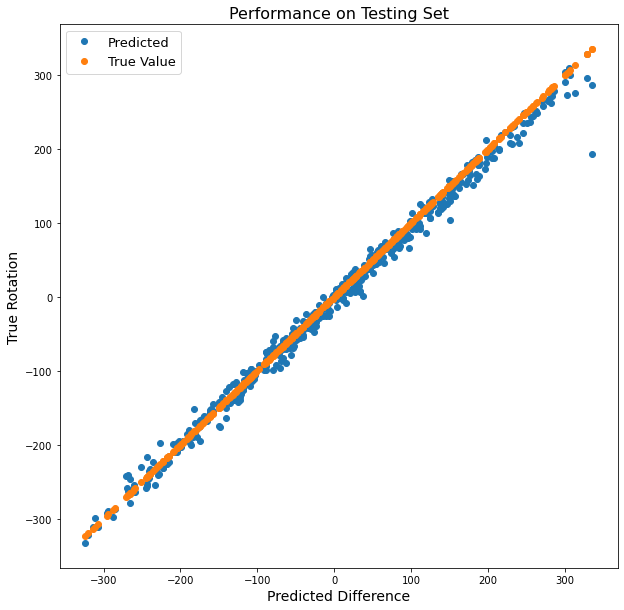

In [76]:
size = len(y_test)
plt.figure(figsize=(10,10))
plt.plot(y_test, list(test_predictions), 'o', label='Predicted', lw=3)
plt.plot(y_test, y_test, 'o', label='True Value', lw=3)
plt.ylabel("True Rotation", fontsize=14)
plt.xlabel("Predicted Difference", fontsize=14)
plt.legend(fontsize=13)
plt.title("Performance on Testing Set", fontsize=16)
plt.show()

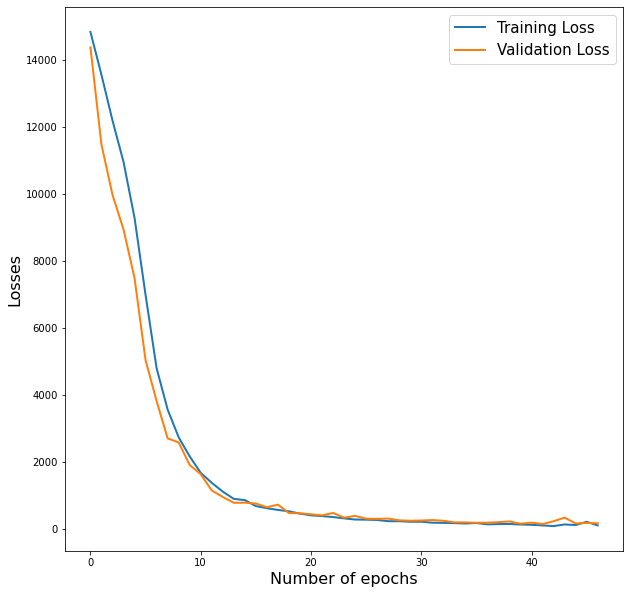

In [77]:
losses = history.history['loss'][3:]
val_losses = history.history['val_loss'][3:]

plt.figure(figsize=(10,10))
plt.plot(range(len(losses)), losses, lw=2, label="Training Loss")
plt.plot(range(len(losses)), val_losses, lw=2, label="Validation Loss")
plt.ylabel("Losses", fontsize=16)
plt.xlabel("Number of epochs", fontsize=16)
plt.legend(fontsize=15)
plt.show()

In [78]:
subtracted_by_0 = np.array([plain_images[i] - plain_images[0] for i in range(360)])
predicted_rotations = model.predict(subtracted_by_0)

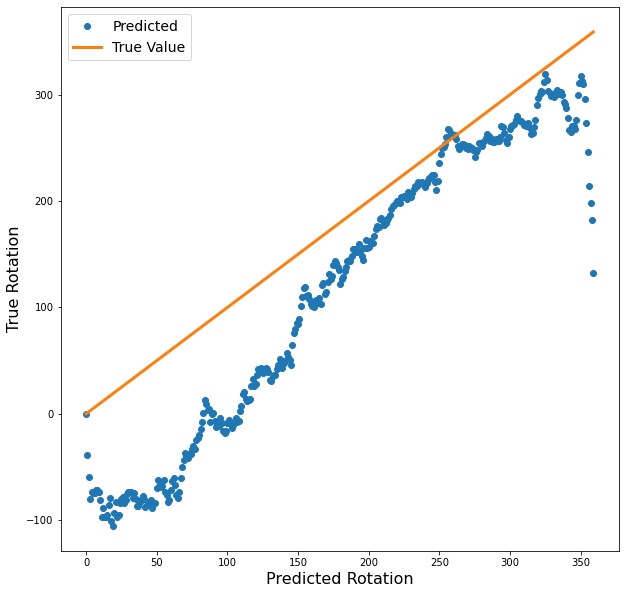

In [79]:
plt.figure(figsize=(10,10))
plt.plot(range(360), list(predicted_rotations), 'o', label='Predicted', lw=3)
plt.plot(range(360), range(360), label='True Value', lw=3)
plt.ylabel("True Rotation", fontsize=16)
plt.xlabel("Predicted Rotation", fontsize=16)
plt.legend(fontsize=14)
plt.show()